<a href="https://colab.research.google.com/github/ayushicodes777-rgb/UIDAI-Dataset-Exploration/blob/main/01_demographic_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
import os

zip_path = "api_data_aadhar_demographic.zip"
extract_path = "demographic_data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

os.listdir(extract_path)


['api_data_aadhar_demographic']

In [ ]:
os.listdir("demographic_data/api_data_aadhar_demographic")


['api_data_aadhar_demographic_1500000_2000000.csv',
 'api_data_aadhar_demographic_1000000_1500000.csv',
 'api_data_aadhar_demographic_2000000_2071700.csv',
 'api_data_aadhar_demographic_500000_1000000.csv',
 'api_data_aadhar_demographic_0_500000.csv']

In [ ]:
import pandas as pd

demo_path = "demographic_data/api_data_aadhar_demographic"
csv_files = [f for f in os.listdir(demo_path) if f.endswith(".csv")]

csv_files


['api_data_aadhar_demographic_1500000_2000000.csv',
 'api_data_aadhar_demographic_1000000_1500000.csv',
 'api_data_aadhar_demographic_2000000_2071700.csv',
 'api_data_aadhar_demographic_500000_1000000.csv',
 'api_data_aadhar_demographic_0_500000.csv']

In [ ]:
import pandas as pd
import os

demo_path = "demographic_data/api_data_aadhar_demographic"

csv_files = sorted([f for f in os.listdir(demo_path) if f.endswith(".csv")])

dfs = []

for file in csv_files:
    print("Loading:", file)
    temp_df = pd.read_csv(f"{demo_path}/{file}")
    dfs.append(temp_df)

df_demo_all = pd.concat(dfs, ignore_index=True)

df_demo_all.shape


Loading: api_data_aadhar_demographic_0_500000.csv
Loading: api_data_aadhar_demographic_1000000_1500000.csv
Loading: api_data_aadhar_demographic_1500000_2000000.csv
Loading: api_data_aadhar_demographic_2000000_2071700.csv
Loading: api_data_aadhar_demographic_500000_1000000.csv


(2071700, 6)

In [ ]:
df_demo_all.columns


Index(['date', 'state', 'district', 'pincode', 'demo_age_5_17',
       'demo_age_17_'],
      dtype='object')

In [ ]:
df_demo_all.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071700 entries, 0 to 2071699
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   date           object
 1   state          object
 2   district       object
 3   pincode        int64 
 4   demo_age_5_17  int64 
 5   demo_age_17_   int64 
dtypes: int64(3), object(3)
memory usage: 94.8+ MB


In [ ]:
df_demo_all["date"].nunique(), df_demo_all["date"].min(), df_demo_all["date"].max()


(95, '01-03-2025', '31-10-2025')

In [ ]:
df_demo_all["state"].head(10)
df_demo_all["state"].nunique()


65

In [ ]:
df_demo_all.to_csv("demographic_merged_raw.csv", index=False)


In [ ]:
df_demo_all.columns


Index(['date', 'state', 'district', 'pincode', 'demo_age_5_17',
       'demo_age_17_'],
      dtype='object')

In [ ]:
df_demo_clean = df_demo_all.copy()

In [ ]:
df_demo_clean["total_demo_updates"] = (
    df_demo_clean["demo_age_5_17"] +
    df_demo_clean["demo_age_17_"]
)


In [ ]:
df_demo_clean["share_5_17"] = (
    df_demo_clean["demo_age_5_17"] / df_demo_clean["total_demo_updates"]
)

df_demo_clean["share_17_plus"] = (
    df_demo_clean["demo_age_17_"] / df_demo_clean["total_demo_updates"]
)


In [ ]:
df_demo_clean[
    ["date", "state", "district", "total_demo_updates", "share_5_17", "share_17_plus"]
].head()


,date,state,district,total_demo_updates,share_5_17,share_17_plus
0,01-03-2025,Uttar Pradesh,Gorakhpur,578,0.084775,0.915225
1,01-03-2025,Andhra Pradesh,Chittoor,397,0.055416,0.944584
2,01-03-2025,Gujarat,Rajkot,830,0.078313,0.921687
3,01-03-2025,Andhra Pradesh,Srikakulam,338,0.071006,0.928994
4,01-03-2025,Rajasthan,Udaipur,830,0.054217,0.945783


In [ ]:
ne_states = [
    "Arunachal Pradesh",
    "Assam",
    "Manipur",
    "Meghalaya",
    "Mizoram",
    "Nagaland",
    "Sikkim",
    "Tripura"
]


In [ ]:
df_demo_clean["region"] = df_demo_clean["state"].apply(
    lambda x: "North East" if x in ne_states else "Mainland"
)


In [ ]:
df_demo_clean["region"].value_counts()


,count
region,
Mainland,1971549
North East,100151


In [ ]:
state_date_demo = (
    df_demo_clean
    .groupby(["state", "region", "date"], as_index=False)
    .agg(
        total_demo_updates=("total_demo_updates", "sum"),
        avg_share_5_17=("share_5_17", "mean"),
        avg_share_17_plus=("share_17_plus", "mean")
    )
)


In [ ]:
state_date_demo.head()


,state,region,date,total_demo_updates,avg_share_5_17,avg_share_17_plus
0,100000,Mainland,20-12-2025,1,0.0,1.0
1,100000,Mainland,23-12-2025,1,0.0,1.0
2,Andaman & Nicobar Islands,Mainland,01-09-2025,18,0.0,1.0
3,Andaman & Nicobar Islands,Mainland,01-11-2025,10,0.0,1.0
4,Andaman & Nicobar Islands,Mainland,01-12-2025,18,0.0,1.0


In [ ]:
df_demo_clean = df_demo_all.copy()

# Remove rows where state is numeric (like 100000)
df_demo_clean = df_demo_clean[
    ~df_demo_clean["state"].astype(str).str.fullmatch(r"\d+")
]


In [ ]:
df_demo_clean["state"].nunique(), df_demo_clean["state"].head(10)


(64,
 0     Uttar Pradesh
 1    Andhra Pradesh
 2           Gujarat
 3    Andhra Pradesh
 4         Rajasthan
 5         Rajasthan
 6         Karnataka
 7     Uttar Pradesh
 8    Andhra Pradesh
 9       West Bengal
 Name: state, dtype: object)

In [ ]:
df_demo_clean[df_demo_clean["state"].str.len() < 3].head()


,date,state,district,pincode,demo_age_5_17,demo_age_17_


In [ ]:
df_demo_clean["state"] = (
    df_demo_clean["state"]
    .str.strip()
    .str.title()
)


In [ ]:
df_demo_clean["state"].nunique()


57

In [ ]:
valid_states = [
    "Andhra Pradesh",
    "Arunachal Pradesh",
    "Assam",
    "Bihar",
    "Chhattisgarh",
    "Goa",
    "Gujarat",
    "Haryana",
    "Himachal Pradesh",
    "Jharkhand",
    "Karnataka",
    "Kerala",
    "Madhya Pradesh",
    "Maharashtra",
    "Manipur",
    "Meghalaya",
    "Mizoram",
    "Nagaland",
    "Odisha",
    "Punjab",
    "Rajasthan",
    "Sikkim",
    "Tamil Nadu",
    "Telangana",
    "Tripura",
    "Uttar Pradesh",
    "Uttarakhand",
    "West Bengal",

    # UTs
    "Andaman & Nicobar Islands",
    "Chandigarh",
    "Dadra & Nagar Haveli And Daman & Diu",
    "Delhi",
    "Jammu & Kashmir",
    "Ladakh",
    "Lakshadweep",
    "Puducherry"
]


In [ ]:
df_demo_clean = df_demo_clean[
    df_demo_clean["state"].isin(valid_states)
]


In [ ]:
df_demo_clean["state"].nunique()


35

In [ ]:
sorted(set(valid_states) - set(df_demo_clean["state"].unique()))


['Dadra & Nagar Haveli And Daman & Diu']

In [ ]:
sorted(set(df_demo_clean["state"].unique()) - set(valid_states))


[]

In [ ]:
assert df_demo_clean["state"].nunique() == 35


In [ ]:
df_demo_clean.columns

Index(['date', 'state', 'district', 'pincode', 'demo_age_5_17',
       'demo_age_17_'],
      dtype='object')

In [ ]:
ne_states = [
    "Arunachal Pradesh", "Assam", "Manipur", "Meghalaya",
    "Mizoram", "Nagaland", "Sikkim", "Tripura"
]

df_demo_clean["region"] = df_demo_clean["state"].apply(
    lambda x: "NE" if x in ne_states else "Mainland"
)


In [ ]:
df_demo_clean[["state", "district", "region"]].drop_duplicates().head()


,state,district,region
0,Uttar Pradesh,Gorakhpur,Mainland
1,Andhra Pradesh,Chittoor,Mainland
2,Gujarat,Rajkot,Mainland
3,Andhra Pradesh,Srikakulam,Mainland
4,Rajasthan,Udaipur,Mainland


In [ ]:
df_demo_clean["total_demo_updates"] = (
    df_demo_clean["demo_age_5_17"] +
    df_demo_clean["demo_age_17_"]
)


In [ ]:
df_demo_clean["share_5_17"] = (
    df_demo_clean["demo_age_5_17"] /
    df_demo_clean["total_demo_updates"]
)

df_demo_clean["share_17_plus"] = (
    df_demo_clean["demo_age_17_"] /
    df_demo_clean["total_demo_updates"]
)


In [ ]:
df_demo_clean = df_demo_clean.drop(columns=["pincode"])


In [ ]:
ne_states = [
    "Arunachal Pradesh", "Assam", "Manipur", "Meghalaya",
    "Mizoram", "Nagaland", "Sikkim", "Tripura"
]

df_demo_clean["region"] = df_demo_clean["state"].apply(
    lambda x: "NE" if x in ne_states else "Mainland"
)


In [ ]:
district_date_demo = (
    df_demo_clean
    .groupby(["state", "district", "region", "date"], as_index=False)
    .agg(
        total_demo_updates=("total_demo_updates", "sum"),
        avg_share_5_17=("share_5_17", "mean"),
        avg_share_17_plus=("share_17_plus", "mean")
    )
)


In [ ]:
df_demo_clean

,date,state,district,demo_age_5_17,demo_age_17_,region,total_demo_updates,share_5_17,share_17_plus
0,01-03-2025,Uttar Pradesh,Gorakhpur,49,529,Mainland,578,0.084775,0.915225
1,01-03-2025,Andhra Pradesh,Chittoor,22,375,Mainland,397,0.055416,0.944584
2,01-03-2025,Gujarat,Rajkot,65,765,Mainland,830,0.078313,0.921687
3,01-03-2025,Andhra Pradesh,Srikakulam,24,314,Mainland,338,0.071006,0.928994
4,01-03-2025,Rajasthan,Udaipur,45,785,Mainland,830,0.054217,0.945783
...,...,...,...,...,...,...,...,...,...
2071695,31-10-2025,Uttar Pradesh,Etah,2,17,Mainland,19,0.105263,0.894737
2071696,31-10-2025,Uttar Pradesh,Etah,1,27,Mainland,28,0.035714,0.964286
2071697,31-10-2025,Uttar Pradesh,Etawah,3,10,Mainland,13,0.230769,0.769231
2071698,31-10-2025,Uttar Pradesh,Etawah,1,25,Mainland,26,0.038462,0.961538


In [ ]:
ne_states = [
    "Arunachal Pradesh", "Assam", "Manipur", "Meghalaya",
    "Mizoram", "Nagaland", "Sikkim", "Tripura"
]


In [ ]:
df_demo_clean["region"] = df_demo_clean["state"].apply(
    lambda x: "NE" if x in ne_states else "Mainland"
)


In [ ]:
df_demo_clean["region"].value_counts()


,count
region,
Mainland,1932193
NE,100151


In [ ]:
df_demo_clean["total_demo_updates"] = (
    df_demo_clean["demo_age_5_17"] +
    df_demo_clean["demo_age_17_"]
)


In [ ]:
df_demo_clean[["demo_age_5_17", "demo_age_17_", "total_demo_updates"]].head()


,demo_age_5_17,demo_age_17_,total_demo_updates
0,49,529,578
1,22,375,397
2,65,765,830
3,24,314,338
4,45,785,830


In [ ]:
df_demo_clean = df_demo_clean[df_demo_clean["total_demo_updates"] > 0]


In [ ]:
df_demo_clean["share_5_17"] = (
    df_demo_clean["demo_age_5_17"] / df_demo_clean["total_demo_updates"]
)

df_demo_clean["share_17_plus"] = (
    df_demo_clean["demo_age_17_"] / df_demo_clean["total_demo_updates"]
)


/tmp/ipython-input-594332774.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_demo_clean["share_5_17"] = (
/tmp/ipython-input-594332774.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_demo_clean["share_17_plus"] = (


In [ ]:
df_demo_clean[["share_5_17", "share_17_plus"]].describe()


,share_5_17,share_17_plus
count,2.030258e+06,2.030258e+06
mean,1.126739e-01,8.873261e-01
std,1.827848e-01,1.827848e-01
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,8.409091e-01
50%,3.636364e-02,9.636364e-01
75%,1.590909e-01,1.000000e+00
max,1.000000e+00,1.000000e+00


In [ ]:
district_date = (
    df_demo_clean
    .groupby(["state", "district", "region", "date"], as_index=False)
    .agg(
        total_updates=("total_demo_updates", "sum"),
        avg_share_5_17=("share_5_17", "mean"),
        avg_share_17_plus=("share_17_plus", "mean")
    )
)


In [ ]:
district_date.head()


,state,district,region,date,total_updates,avg_share_5_17,avg_share_17_plus
0,Andaman & Nicobar Islands,Andamans,Mainland,01-09-2025,11,0.0,1.0
1,Andaman & Nicobar Islands,Andamans,Mainland,01-11-2025,9,0.0,1.0
2,Andaman & Nicobar Islands,Andamans,Mainland,01-12-2025,13,0.0,1.0
3,Andaman & Nicobar Islands,Andamans,Mainland,02-09-2025,17,0.0,1.0
4,Andaman & Nicobar Islands,Andamans,Mainland,02-11-2025,2,0.0,1.0


In [ ]:
district_intensity = (
    district_date
    .groupby(["region", "state", "district"])
    .agg(mean_updates=("total_updates", "mean"))
    .reset_index()
)


In [ ]:
district_intensity.groupby("region")["mean_updates"].describe()


,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
Mainland,838.0,606.273225,683.877340,1.000000,102.250641,403.572906,838.977993,4707.926316
NE,136.0,136.679117,193.285422,1.352941,16.095889,43.253740,181.571429,1058.445652


In [ ]:
district_volatility = (
    district_date
    .groupby(["region", "state", "district"])
    .agg(volatility=("total_updates", "std"))
    .reset_index()
)


In [ ]:
district_volatility.groupby("region")["volatility"].describe()


,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
Mainland,823.0,1537.669400,1716.752131,0.000000,201.336403,974.270227,2242.571817,11041.240296
NE,136.0,295.287883,366.012601,0.492592,22.238067,137.260116,500.466562,1878.570279


In [ ]:
district_age_profile = (
    district_date
    .groupby(["region", "state", "district"])
    .agg(
        mean_share_5_17=("avg_share_5_17", "mean"),
        mean_share_17_plus=("avg_share_17_plus", "mean")
    )
    .reset_index()
)


In [ ]:
district_age_profile.groupby("region")[["mean_share_5_17", "mean_share_17_plus"]].mean()


,mean_share_5_17,mean_share_17_plus
region,,
Mainland,0.104965,0.895035
NE,0.130086,0.869914


In [ ]:
district_coverage = (
    district_date
    .groupby(["region", "state", "district"])
    .agg(unique_dates=("date", "nunique"))
    .reset_index()
)


In [ ]:
district_coverage.groupby("region")["unique_dates"].describe()


,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
Mainland,838.0,83.547733,23.424032,1.0,90.0,91.0,94.0,95.0
NE,136.0,78.727941,18.530642,2.0,76.0,86.5,91.0,93.0


In [ ]:
high_ne = (
    district_intensity[district_intensity["region"] == "NE"]
    .sort_values("mean_updates", ascending=False)
    .head(10)
)


In [ ]:
low_mainland = (
    district_intensity[district_intensity["region"] == "Mainland"]
    .sort_values("mean_updates")
    .head(10)
)


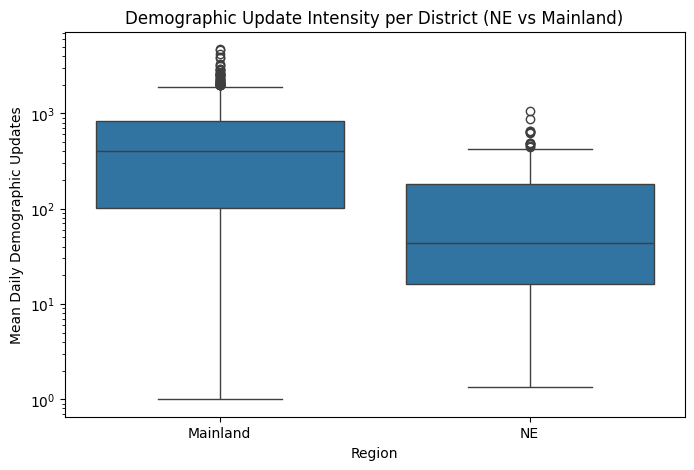

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(
    data=district_intensity,
    x="region",
    y="mean_updates"
)

plt.title("Demographic Update Intensity per District (NE vs Mainland)")
plt.ylabel("Mean Daily Demographic Updates")
plt.xlabel("Region")
plt.yscale("log")  # optional but recommended due to skew
plt.show()


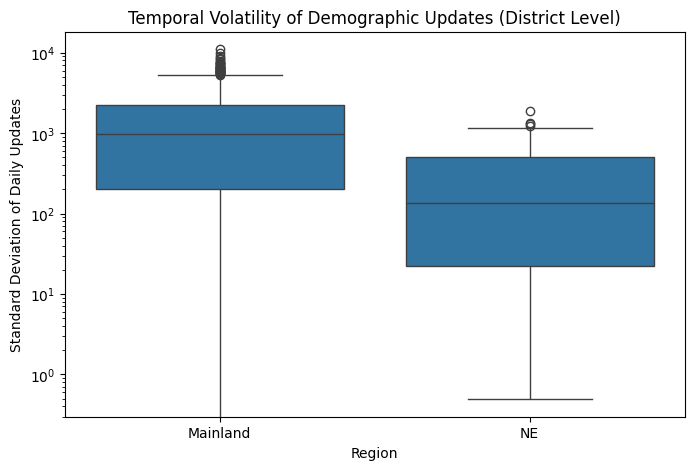

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=district_volatility,
    x="region",
    y="volatility"
)

plt.title("Temporal Volatility of Demographic Updates (District Level)")
plt.ylabel("Standard Deviation of Daily Updates")
plt.xlabel("Region")
plt.yscale("log")
plt.show()


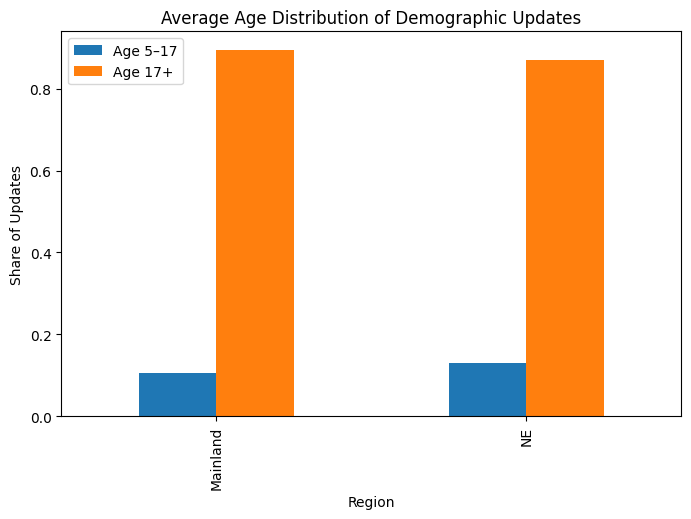

In [ ]:
age_region = (
    district_age_profile
    .groupby("region")[["mean_share_5_17", "mean_share_17_plus"]]
    .mean()
    .reset_index()
)

age_region.plot(
    x="region",
    kind="bar",
    figsize=(8, 5)
)

plt.title("Average Age Distribution of Demographic Updates")
plt.ylabel("Share of Updates")
plt.xlabel("Region")
plt.legend(["Age 5–17", "Age 17+"])
plt.show()


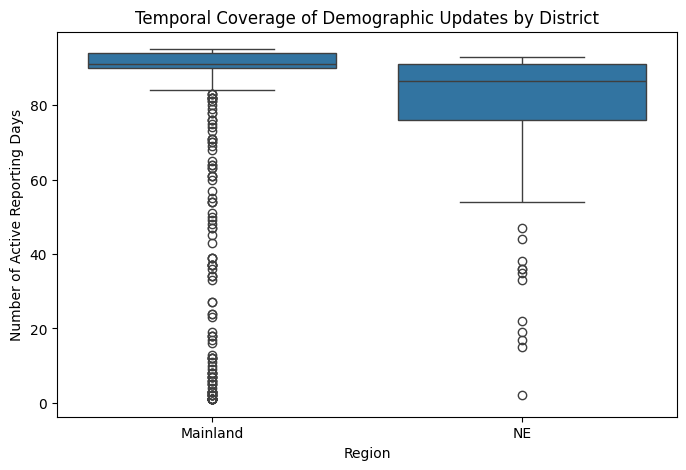

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=district_coverage,
    x="region",
    y="unique_dates"
)

plt.title("Temporal Coverage of Demographic Updates by District")
plt.ylabel("Number of Active Reporting Days")
plt.xlabel("Region")
plt.show()


In [ ]:
district_summary = (
    district_date
    .groupby(["state", "district", "region"], as_index=False)
    .agg(
        avg_daily_updates=("total_updates", "mean"),
        volatility=("total_updates", "std"),
        coverage_days=("date", "nunique"),
        mean_share_5_17=("avg_share_5_17", "mean"),
        mean_share_17_plus=("avg_share_17_plus", "mean")
    )
)


In [ ]:
district_summary["rank_within_state"] = (
    district_summary
    .groupby("state")["avg_daily_updates"]
    .rank(method="dense", ascending=False)
)


In [ ]:
top_districts = district_summary[
    district_summary["rank_within_state"] <=
    district_summary.groupby("state")["rank_within_state"].transform("max") * 0.1
]


In [ ]:
bottom_districts = district_summary[
    district_summary["rank_within_state"] >=
    district_summary.groupby("state")["rank_within_state"].transform("max") * 0.9
]


In [ ]:
state_inequality = (
    district_summary
    .groupby("state")
    .agg(
        max_updates=("avg_daily_updates", "max"),
        min_updates=("avg_daily_updates", "min")
    )
)

state_inequality["spread"] = (
    state_inequality["max_updates"] -
    state_inequality["min_updates"]
)

state_inequality = state_inequality.sort_values("spread", ascending=False)


In [ ]:
update_q = district_summary["avg_daily_updates"].quantile(0.75)
vol_q = district_summary["volatility"].quantile(0.75)

district_summary["migration_flag"] = (
    (district_summary["avg_daily_updates"] > update_q) &
    (district_summary["volatility"] > vol_q) &
    (district_summary["mean_share_17_plus"] > 0.6)
)


In [ ]:
district_summary.groupby("region")[
    ["avg_daily_updates", "volatility", "coverage_days"]
].describe()


avg_daily_updates                                                \
                     count        mean         std       min         25%   
region                                                                     
Mainland             838.0  606.273225  683.877340  1.000000  102.250641   
NE                   136.0  136.679117  193.285422  1.352941   16.095889   

                                              volatility               ...  \
                 50%         75%          max      count         mean  ...   
region                                                                 ...   
Mainland  403.572906  838.977993  4707.926316      823.0  1537.669400  ...   
NE         43.253740  181.571429  1058.445652      136.0   295.287883  ...   

                                    coverage_days                             \
                  75%           max         count       mean        std  min   
region                                                                         
Mainland  2242.571817  11041.240296         838.0  83.547733  23.424032  1.0   
NE         500.466562   1878.570279         136.0  78.727941  18.530642  2.0   

                                  
           25%   50%   75%   max  
region                            
Mainland  90.0  91.0  94.0  95.0  
NE        76.0  86.5  91.0  93.0  

[2 rows x 24 columns]

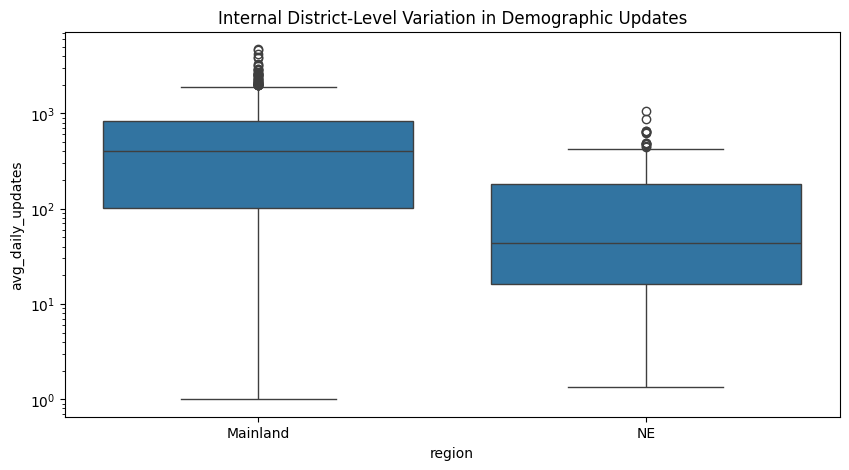

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=district_summary,
    x="region",
    y="avg_daily_updates"
)
plt.yscale("log")
plt.title("Internal District-Level Variation in Demographic Updates")
plt.show()


In [ ]:
state_performance = (
    district_summary
    .groupby("state")
    .agg(state_avg=("avg_daily_updates", "mean"))
    .sort_values("state_avg", ascending=False)
)

top_states = state_performance.head(5).index.tolist()
top_states


['Delhi', 'Bihar', 'Uttar Pradesh', 'Maharashtra', 'West Bengal']

In [ ]:
worst_districts_top_states = district_summary[
    (district_summary["state"].isin(top_states)) &
    (district_summary["rank_within_state"] ==
     district_summary.groupby("state")["rank_within_state"].transform("max"))
]


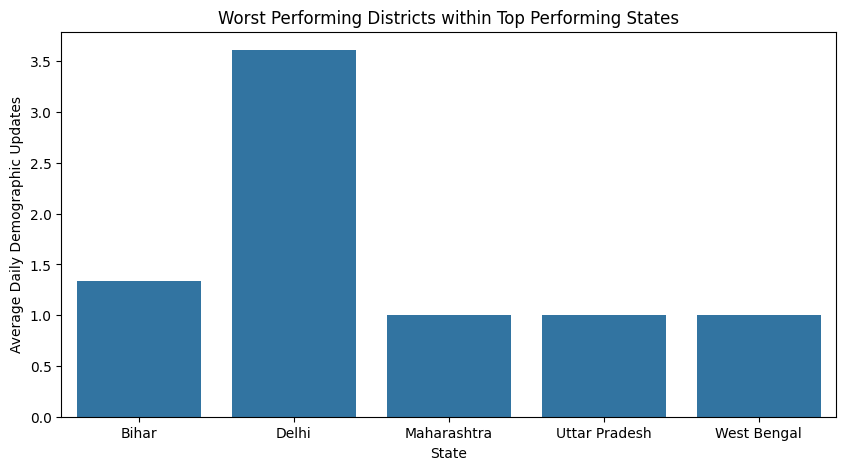

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(
    data=worst_districts_top_states,
    x="state",
    y="avg_daily_updates"
)

plt.title("Worst Performing Districts within Top Performing States")
plt.ylabel("Average Daily Demographic Updates")
plt.xlabel("State")
plt.show()


In [ ]:
weak_states = state_performance.tail(5).index.tolist()
weak_states


['Sikkim',
 'Arunachal Pradesh',
 'Lakshadweep',
 'Andaman & Nicobar Islands',
 'Jammu & Kashmir']

In [ ]:
best_districts_weak_states = district_summary[
    (district_summary["state"].isin(weak_states)) &
    (district_summary["rank_within_state"] == 1)
]


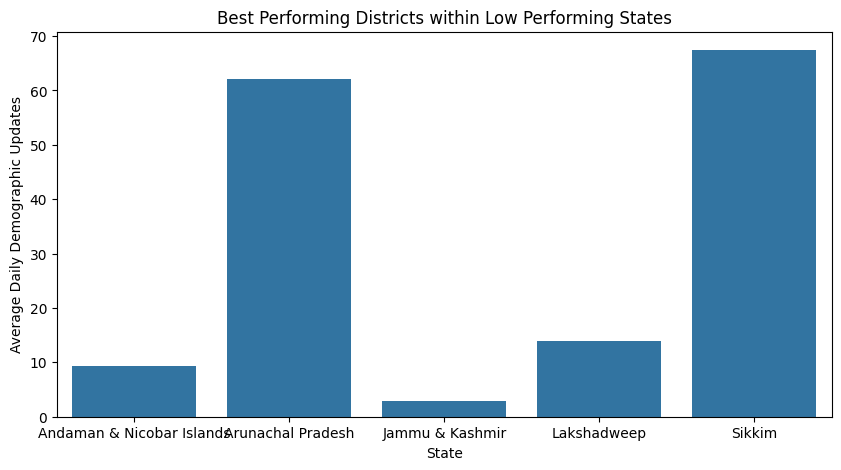

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(
    data=best_districts_weak_states,
    x="state",
    y="avg_daily_updates"
)

plt.title("Best Performing Districts within Low Performing States")
plt.ylabel("Average Daily Demographic Updates")
plt.xlabel("State")
plt.show()


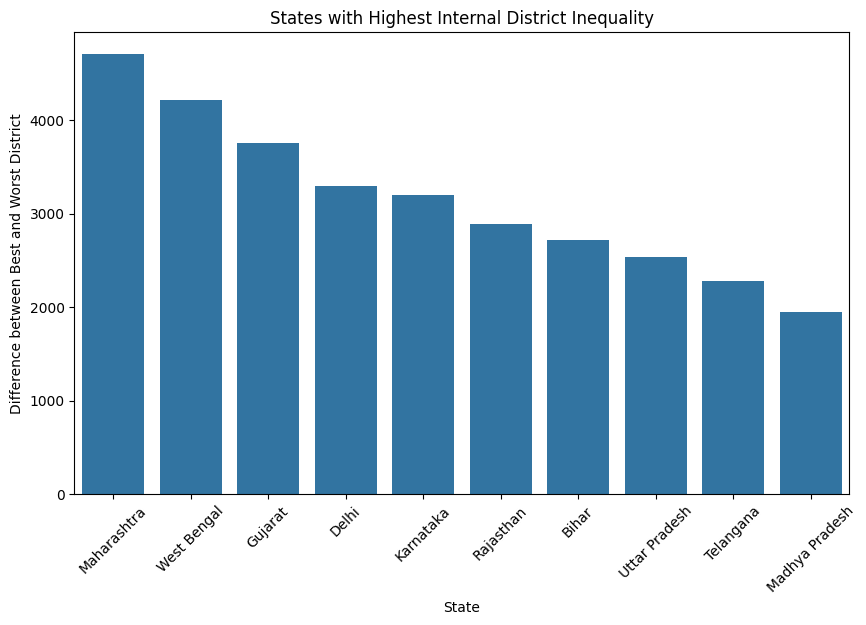

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=state_inequality.reset_index().head(10),
    x="state",
    y="spread"
)

plt.xticks(rotation=45)
plt.title("States with Highest Internal District Inequality")
plt.ylabel("Difference between Best and Worst District")
plt.xlabel("State")
plt.show()
